# Machine Learning Supervised Learning

### Setup & Data Preprocessing

In [1]:
# !pip install numpy pandas matplotlib scikit-learn

In [2]:
# import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import time


In [3]:
# Load dataset
data = pd.read_csv("/Users/abhinavpaul/Desktop/Goals/Exec Edu/1. ISB AMPBA/Course Material/Term 3/3. MLSL2/Assignment/tmnst Dataset.csv")
print("Raw data structure\n", data.shape)

data.describe()


Raw data structure
 (74724, 785)


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,74724.0,74724.0,74724.0,74724.0,74724.0,74724.0,74724.0,74724.0,74724.000000,74724.000000,...,74724.000000,74724.000000,74724.000000,74724.0,74724.0,74724.0,74724.0,74724.0,74724.0,74724.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003667,0.001512,...,0.001405,0.000094,0.000174,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.910918,0.258698,...,0.376832,0.022252,0.047557,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.000000,53.000000,...,103.000000,6.000000,13.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Remove all-zero columns
data = data.loc[:, (data != 0).any(axis=0)]

# Separate features and labels
X = data.drop("labels", axis=1).values

y = data["labels"].values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

_encoder = []
for i, label in enumerate(label_encoder.classes_): _encoder.append([label, i])
y_map = pd.DataFrame(_encoder, columns=["Label","LabelEndoded"])
print(y_map) # for decodeing later ( we can also used -> label_encoder.inverse_transform(y_encoded) )

# Normalize features for each pixel value from [0,1] range instead of [0,255]
X = X / 255.0

print("Data structure after removing Zero-columns and Normalizing the Input columns\n", X.shape)
print("Label encoded", np.unique(y_encoded))
pd.DataFrame(X).describe()


   Label  LabelEndoded
0      A             0
1      B             1
2      C             2
3      D             3
4      E             4
5      F             5
6      G             6
7      H             7
8      I             8
9      J             9
10     K            10
11     L            11
12     M            12
13     N            13
14     O            14
15     P            15
16     Q            16
17     R            17
18     S            18
19     T            19
20     U            20
21     V            21
22     W            22
23     X            23
24     Y            24
25     Z            25
Data structure after removing Zero-columns and Normalizing the Input columns
 (74724, 689)
Label encoded [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


,0,1,2,3,4,5,6,7,8,9,...,679,680,681,682,683,684,685,686,687,688
count,74724.000000,74724.000000,74724.000000,74724.000000,74724.000000,74724.000000,74724.000000,7.472400e+04,74724.000000,74724.000000,...,74724.000000,74724.000000,74724.000000,74724.000000,74724.000000,74724.000000,74724.000000,74724.000000,7.472400e+04,7.472400e+04
mean,0.000014,0.000006,0.000005,0.000010,0.000058,0.000004,0.000016,5.248071e-08,0.000005,0.000002,...,0.001375,0.002041,0.003267,0.004613,0.002425,0.000362,0.000036,0.000006,3.673650e-07,6.822492e-07
std,0.003572,0.001015,0.000856,0.001744,0.005922,0.001176,0.003165,1.434596e-05,0.001262,0.000574,...,0.031359,0.038068,0.045938,0.061675,0.039342,0.011387,0.003696,0.001478,8.726291e-05,1.864975e-04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
max,0.972549,0.207843,0.164706,0.337255,0.611765,0.321569,0.619608,3.921569e-03,0.345098,0.156863,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.843137,0.403922,2.352941e-02,5.098039e-02


In [5]:
# Train/test split (70/30 stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (52306, 689)  Test shape: (22418, 689)


## Problem 1: Neural Network Classifier

In [6]:
# Define Architecture to iterate on
architectures = {
    # One hidden layer with 5, 10, 20, 25 neurons
    "HL: 1, N :(5,) [1-5]": (1, [5]),
    "HL: 1, N :(10,) [1-10]": (1, [10]),
    "HL: 1, N :(20,) [1-20]": (1, [20]),
    "HL: 1, N :(25,) [1-25]": (1, [25]),
    # Two hidden layers with (5, 5), (5, 10), (10, 5), (10, 10) neurons in (layer 1, layer 2)
    "HL: 2, N :(5,5,) [2-5-5]": (2, [5,5]),
    "HL: 2, N :(5,10,) [2-5-10]": (2, [5,10]),
    "HL: 2, N :(10,5,) [2-10-5]": (2, [10,5]),
    "HL: 2, N :(10,10,) [2-10-10]": (2, [10,10]),
    # adding few more architecture for my exploration (Not asked in Assignment)
    "HL: 2, N :(10,20,) [2-10-20]": (2, [10,20]),
    "HL: 2, N :(20,20,) [2-20-20]": (2, [20,20]),
    "HL: 2, N :(20,25,) [2-20-25]": (2, [20,25]),
    "HL: 2, N :(25,25,) [2-25-25]": (2, [25,25]),
    "HL: 3, N :(5,5,5,) [3-5-5-5]": (3, [5,5,5]),
    "HL: 3, N :(5,10,5,) [3-5-10-5]": (3, [5,10,5])
}


In [7]:
# Nueral Network Looping through all the architecture defined above
max_iter=300
learning_rate_init=0.01
batch_size=128

results = []

start_time_1 = time.time() # intializing to track total looptime across all the architecture

for name, (hidden_layers, layer_sizes) in architectures.items():
    start_time = time.time() # intializing to track total looptime for architecture in the loop
    print("Training...")
    print("Achitecture :", name)

    # Create MLP model
    mlp = MLPClassifier(
        # we dont have to pass the Hiden layer dimension as the MLPClassifier picks up the Required hidden layer based on the lenght of passed Nueron structure array 
        # ex. [1] 1 HL, [9,9] 2 HL and so on
        hidden_layer_sizes=layer_sizes, 
        max_iter=max_iter,
        random_state=42,
        learning_rate_init=learning_rate_init,
        batch_size=batch_size
    )

    # Printing Train model progress with Time elapsed
    for epoch in range(1, max_iter+1):
        mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
        if epoch % 300 == 0:
            elapsed = time.time() - start_time
            print(f"Epoch - {epoch}/300 : Elapsed - {elapsed:.1f}s")

    # Train model
    mlp.fit(X_train, y_train)
    
    # Evaluate
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Calculate total number of trainable parameters in the MultiLayered Perceptron (MLP) classifier model
    # Equation for Output of Perceptron of each layer = Act.Func( Vector transpose of Weights(Wt) * Vector Inputs(X) + Vector of Bias/Intercept(W0) ) 
    # 1. Sum sizes of all weight matrices across layers
    #    - Each weight matrix connects one layer to the next
    # 2. Sum sizes of all bias vectors across layers (one for each neuron in hidden/output layers)
    #    - Each layer (except input) has a bias vector
    # Total parameters = (weights) + (biases)
    n_params = sum([w.size for w in mlp.coefs_]) + sum([b.size for b in mlp.intercepts_])
    
    # Calculate total time
    total_time = time.time() - start_time
    print(f"Architecture total Elapse time: {total_time:.2f} seconds")

    results.append([name, n_params, acc])

total_time_1 = time.time() - start_time    
print(f"Total Elapse time: {total_time_1:.2f} seconds")

# creating final output DataFrame
df_nn = pd.DataFrame(results, columns=["Architecture","Parameters","Test Accuracy"])


Training...
Achitecture : HL: 1, N :(5,) [1-5]
Epoch - 300/300 : Elapsed - 218.1s
Architecture total Elapse time: 261.82 seconds
Training...
Achitecture : HL: 1, N :(10,) [1-10]
Epoch - 300/300 : Elapsed - 433.5s
Architecture total Elapse time: 625.77 seconds
Training...
Achitecture : HL: 1, N :(20,) [1-20]
Epoch - 300/300 : Elapsed - 602.8s
Architecture total Elapse time: 812.01 seconds
Training...
Achitecture : HL: 1, N :(25,) [1-25]
Epoch - 300/300 : Elapsed - 983.1s
Architecture total Elapse time: 1094.12 seconds
Training...
Achitecture : HL: 2, N :(5,5,) [2-5-5]
Epoch - 300/300 : Elapsed - 255.1s
Architecture total Elapse time: 378.32 seconds
Training...
Achitecture : HL: 2, N :(5,10,) [2-5-10]
Epoch - 300/300 : Elapsed - 501.1s
Architecture total Elapse time: 582.17 seconds
Training...
Achitecture : HL: 2, N :(10,5,) [2-10-5]
Epoch - 300/300 : Elapsed - 537.6s
Architecture total Elapse time: 640.01 seconds
Training...
Achitecture : HL: 2, N :(10,10,) [2-10-10]
Epoch - 300/300 : E

In [8]:
df_nn.sort_values(['Parameters'],ascending=True).to_csv('df_nn_architecture_prob1.csv',index=False)
df_nn.sort_values(['Parameters'],ascending=True)

,Architecture,Parameters,Test Accuracy
0,"HL: 1, N :(5,) [1-5]",3606,0.905210
4,"HL: 2, N :(5,5,) [2-5-5]",3636,0.901998
12,"HL: 3, N :(5,5,5,) [3-5-5-5]",3666,0.906994
13,"HL: 3, N :(5,10,5,) [3-5-10-5]",3721,0.843385
5,"HL: 2, N :(5,10,) [2-5-10]",3796,0.814702
6,"HL: 2, N :(10,5,) [2-10-5]",7111,0.914533
1,"HL: 1, N :(10,) [1-10]",7186,0.920689
7,"HL: 2, N :(10,10,) [2-10-10]",7296,0.927469
8,"HL: 2, N :(10,20,) [2-10-20]",7666,0.929387
2,"HL: 1, N :(20,) [1-20]",14346,0.941342


In [9]:
# filtering only the Architecture asked in the questions
df_nn_q = df_nn[0:8].sort_values(['Parameters'],ascending=True)
df_nn_q

,Architecture,Parameters,Test Accuracy
0,"HL: 1, N :(5,) [1-5]",3606,0.905210
4,"HL: 2, N :(5,5,) [2-5-5]",3636,0.901998
5,"HL: 2, N :(5,10,) [2-5-10]",3796,0.814702
6,"HL: 2, N :(10,5,) [2-10-5]",7111,0.914533
1,"HL: 1, N :(10,) [1-10]",7186,0.920689
7,"HL: 2, N :(10,10,) [2-10-10]",7296,0.927469
2,"HL: 1, N :(20,) [1-20]",14346,0.941342
3,"HL: 1, N :(25,) [1-25]",17926,0.941386


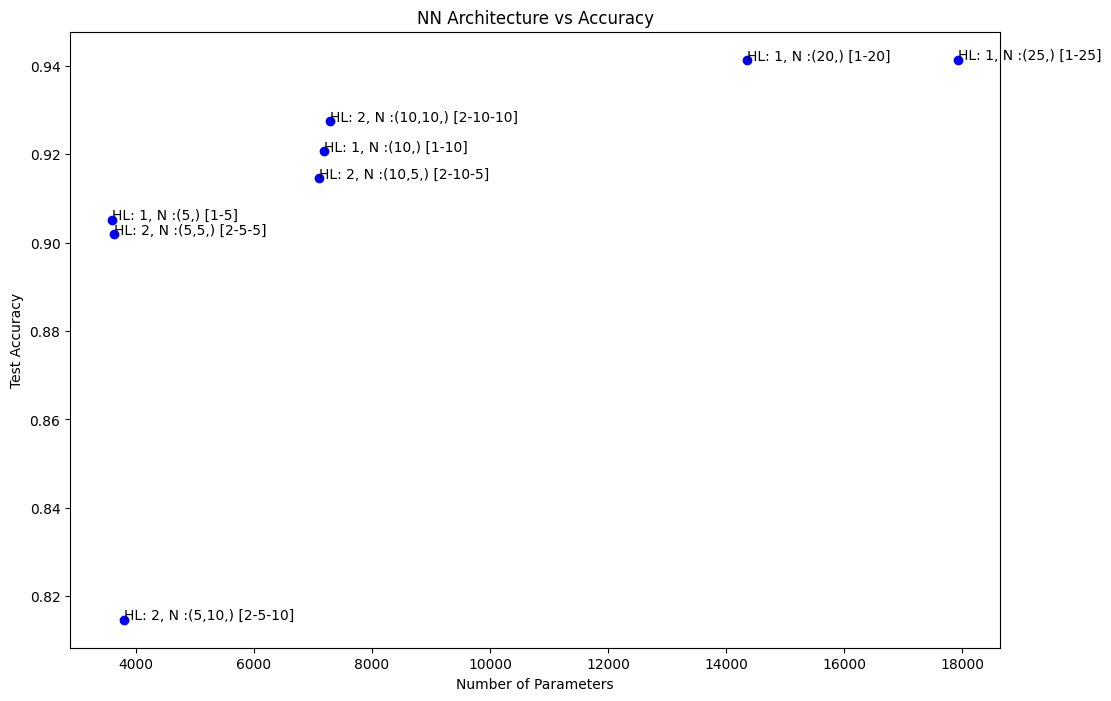

In [10]:
# Scatter plot
plt.figure(figsize=(12,8))
plt.scatter(df_nn_q["Parameters"], df_nn_q["Test Accuracy"], c='blue')
for i,row in df_nn_q.iterrows():
    plt.text(row["Parameters"], row["Test Accuracy"], row["Architecture"])
plt.xlabel("Number of Parameters")
plt.ylabel("Test Accuracy")
plt.title("NN Architecture vs Accuracy")
plt.show()


**Summary:** 
- We observe how model size (parameters) linearly impacts accuracy. with best performance coming at 94.1386% for NN architecture of HL: 1, N :(25,) [1-25] where number of parameters/nuerons/weights totals at 17926
- Typically, larger architectures with high parameters (Nuerons or Weights) gives better accuracy, but at the same time thery may pose a risk of diminishing returns and overfitting.

## Problem 2: SVM Classifier

In [11]:
def svm_explore(X_train, X_test, y_train, y_test, c1, c2, y_map=y_map):
    # get the encoded class value for the letter
    c1_en, c2_en = y_map[y_map.Label==c1].values[0][1], y_map[y_map.Label==c2].values[0][1]
    print(f"Exploring {c1} vs {c2}")

    # Filter two classes
    idx = np.where((y_train==c1_en) | (y_train==c2_en))
    X_tr, y_tr = X_train[idx], y_train[idx]
    idx2 = np.where((y_test==c1_en) | (y_test==c2_en))
    X_te, y_te = X_test[idx2], y_test[idx2]

    records = [] # empty list to save result

    # Linear SVM (C = 5 to 50 in increments of 5)
    for C in range(5, 55, 5):
        clf = SVC(kernel="linear", C=C)
        clf.fit(X_tr, y_tr)
        tr_acc = clf.score(X_tr, y_tr)
        te_acc = clf.score(X_te, y_te)
        records.append([f"Linear/C={C}", len(clf.support_), tr_acc, te_acc])

    # Polynomial kernel (d = 2, d = 3, d = 4, d = 5 and C=10)
    for d in range(2,6):
        clf = SVC(kernel="poly", degree=d, C=10, coef0=1) # this is the setting the default value of c=1 and C=10
        clf.fit(X_tr, y_tr)
        tr_acc = clf.score(X_tr, y_tr)
        te_acc = clf.score(X_te, y_te)
        records.append([f"Poly/d={d}", len(clf.support_), tr_acc, te_acc])

    # RBF kernel (sigma = 2 to 10 in increments of 2)
    for sigma in range(2,12,2):
        gamma = 1.0/(2*sigma**2) # gamma = 1/(number of feature (2 ) * variance of the trainging data set given by sigma square)
        clf = SVC(kernel="rbf", gamma=gamma)
        clf.fit(X_tr, y_tr)
        tr_acc = clf.score(X_tr, y_tr)
        te_acc = clf.score(X_te, y_te)
        records.append([f"RBF/sigma={sigma}", len(clf.support_), tr_acc, te_acc])

    df_svm = pd.DataFrame(records, columns=["Classifier","Support Vectors","Train Acc","Test Acc"])
    return df_svm


In [12]:
df_svm = svm_explore(X_train, X_test, y_train, y_test, 'A', 'B')
df_svm.to_csv('svm_explore_prob2.csv', index=False)
df_svm

Exploring A vs B


,Classifier,Support Vectors,Train Acc,Test Acc
0,Linear/C=5,140,1.000000,0.987819
1,Linear/C=10,140,1.000000,0.987819
2,Linear/C=15,140,1.000000,0.987819
3,Linear/C=20,140,1.000000,0.987819
4,Linear/C=25,140,1.000000,0.987819
5,Linear/C=30,140,1.000000,0.987819
6,Linear/C=35,140,1.000000,0.987819
7,Linear/C=40,140,1.000000,0.987819
8,Linear/C=45,140,1.000000,0.987819
9,Linear/C=50,140,1.000000,0.987819


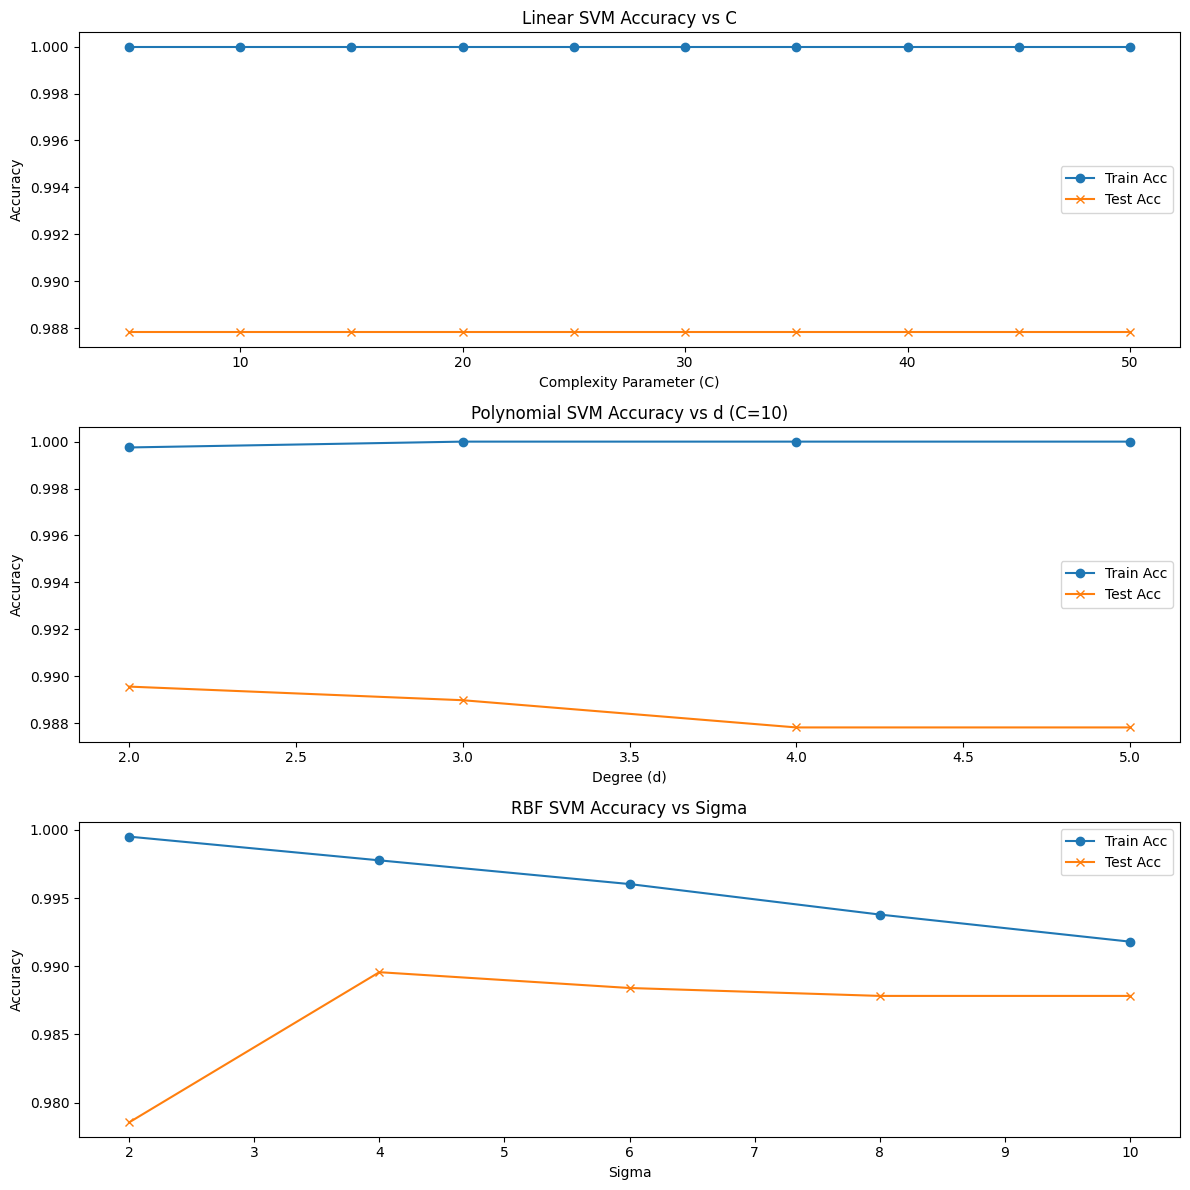

In [13]:
# ---- PLOTS ----
# Linear SVM accuracies vs Complexity Parameter
df_linear = df_svm[df_svm["Classifier"].str.contains("Linear")]
Cs = [int(name.split("=")[1]) for name in df_linear["Classifier"]]

# Polynomial SVM accuracies vs degree () {C = 10 and Kernel coefficient (c)=1}
df_poly = df_svm[df_svm["Classifier"].str.contains("Poly")]
degrees = [int(name.split("=")[1]) for name in df_poly["Classifier"]]

# RBF SVM accuracies vs Sigma
df_rbf = df_svm[df_svm["Classifier"].str.contains("RBF")]
sigmas = [int(name.split("=")[1]) for name in df_rbf["Classifier"]]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (12,12))

ax1.plot(Cs, df_linear["Train Acc"], label="Train Acc", marker='o')
ax1.plot(Cs, df_linear["Test Acc"], label="Test Acc", marker='x')
ax1.set_xlabel("Complexity Parameter (C)")
ax1.set_ylabel("Accuracy")
ax1.set_title("Linear SVM Accuracy vs C")
ax1.legend()

ax2.plot(degrees, df_poly["Train Acc"], label="Train Acc", marker='o')
ax2.plot(degrees, df_poly["Test Acc"], label="Test Acc", marker='x')
ax2.set_xlabel("Degree (d)")
ax2.set_ylabel("Accuracy")
ax2.set_title("Polynomial SVM Accuracy vs d (C=10)")
ax2.legend()

ax3.plot(sigmas, df_rbf["Train Acc"], label="Train Acc", marker='o')
ax3.plot(sigmas, df_rbf["Test Acc"], label="Test Acc", marker='x')
ax3.set_xlabel("Sigma")
ax3.set_ylabel("Accuracy")
ax3.set_title("RBF SVM Accuracy vs Sigma")
ax3.legend()

plt.tight_layout()
plt.show()


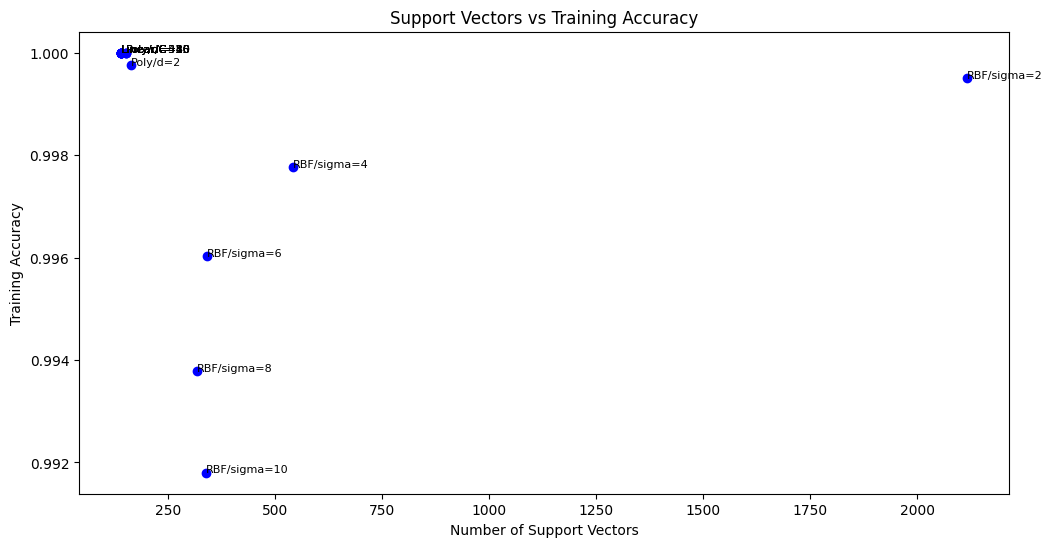

In [14]:
# Scatter plot: Support Vectors vs Training Accuracy
plt.figure(figsize = (12,6))
plt.scatter(df_svm["Support Vectors"], df_svm["Train Acc"], c='blue')
for i, row in df_svm.iterrows():
    plt.text(row["Support Vectors"], row["Train Acc"], row["Classifier"], fontsize=8)
plt.xlabel("Number of Support Vectors")
plt.ylabel("Training Accuracy")
plt.title("Support Vectors vs Training Accuracy")
plt.show()

**Summary for pair(A,B):** 
- There no effect of C value between 5 to 100 on the Test (@ 98.78%) and Train (@ 100%) Accuracy in Linear Kernel. 
- In Polynomial kernel, Training vs test accuracy gap increases marginally with increased degree of the Polynomial Kernel; Training being at 100% accuracy. This looks like memorizing the Training data.
- In RBF kernel with increase Sigma gamma value fo the kernel function equation decreases. This leads to more support vectors and smoother decision boundaries. This also leads to overfitting/memorizing the training data set as we can see a platued Test Accurracy @ 98.8%.

**General Observations:**
- With increase in Support vectors and the complexity of the model in terms of degree or gamma, the training and test accuracy increases upto a certain level. Post which the model staryt to memorize the training set and test accuracy start to drop. 


## Problem 3: Random Forest

In [15]:

def random_forest_explore(X_train, X_test, y_train, y_test, c1, c2, y_map=y_map):
    # get the encoded class value for the letter
    c1_en, c2_en = y_map[y_map.Label==c1].values[0][1], y_map[y_map.Label==c2].values[0][1]

    # Filter two classes from train and test data
    idx1 = np.where((y_train==c1_en) | (y_train==c2_en))
    X_tr, y_tr = X_train[idx1], y_train[idx1]
    idx2 = np.where((y_test==c1_en) | (y_test==c2_en))
    X_te, y_te = X_test[idx2], y_test[idx2]

    train_scores, test_scores = {}, {}

    for depth in range(3,11): # depth of tree 3 - 10 with a increment of 1
        tr_acc_list, te_acc_list = [], []
        for n_trees in range(5,105,5): # number of trees 5 - 100 with a increment of 5
            if n_trees%100==0: # print statement at every 100th Tree of the Depth of iteration - to track run progress
                print("depth :", depth, "ntrees:", n_trees)
            clf = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, random_state=42)
            clf.fit(X_tr, y_tr)
            tr_acc_list.append(clf.score(X_tr, y_tr))
            te_acc_list.append(clf.score(X_te, y_te))
        train_scores[depth] = tr_acc_list
        test_scores[depth] = te_acc_list

    # Plot: Number of Trees vs Test Accuracy 
    plt.figure(figsize=(12,8))
    for depth in train_scores:
        plt.plot(range(5,105,5), test_scores[depth], label=f"Depth {depth}")
    plt.xlabel("Number of Trees")
    plt.ylabel("Test Accuracy")
    plt.title("Trees vs Test Accuracy")
    plt.legend()
    plt.show()

    # Plot: Depth vs Test Accuracy 
    plt.figure(figsize=(12,8))
    for n_trees in range(5,105,20):
        tr, te = [], []
        for depth in range(3,11):
            clf = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, random_state=42)
            clf.fit(X_tr, y_tr)
            tr.append(clf.score(X_tr, y_tr))
            te.append(clf.score(X_te, y_te))
        plt.plot(range(3,11), te, label=f"{n_trees} trees")
    plt.xlabel("Depth")
    plt.ylabel("Test Accuracy")
    plt.title("Depth vs Test Accuracy")
    plt.legend()
    plt.show()


depth : 3 ntrees: 100
depth : 4 ntrees: 100
depth : 5 ntrees: 100
depth : 6 ntrees: 100
depth : 7 ntrees: 100
depth : 8 ntrees: 100
depth : 9 ntrees: 100
depth : 10 ntrees: 100


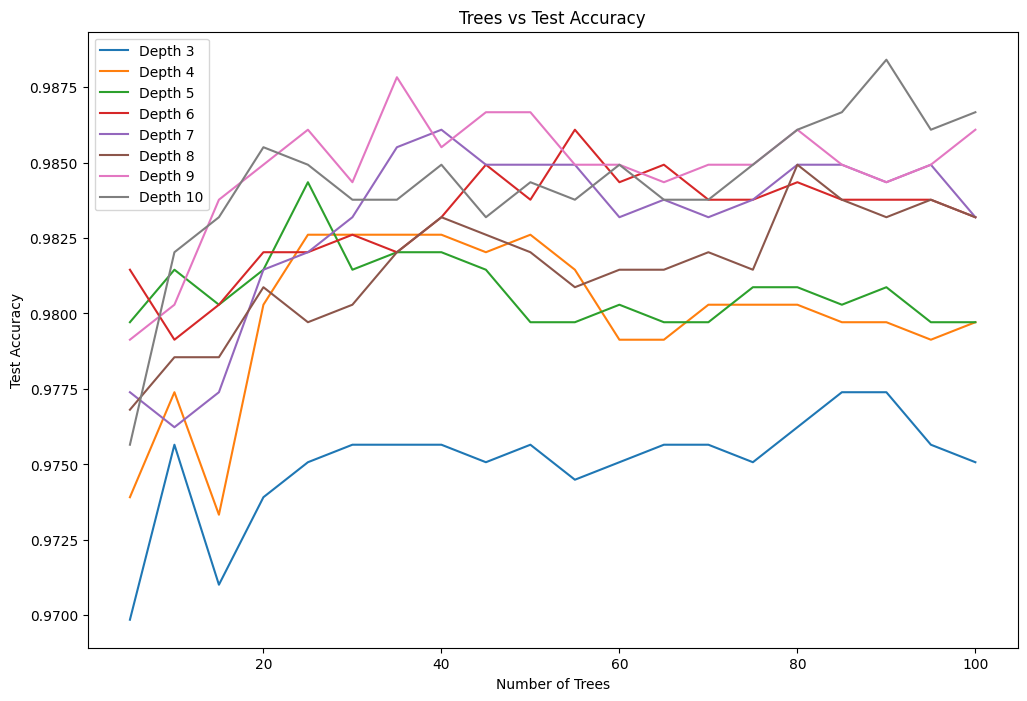

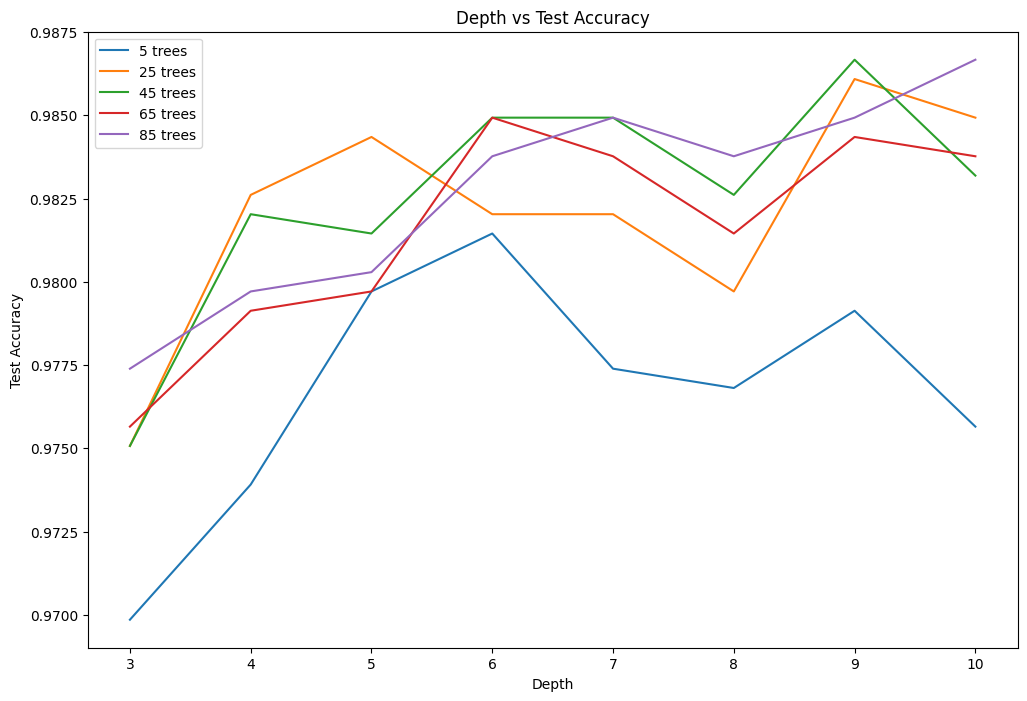

In [16]:
random_forest_explore(X_train, X_test, y_train, y_test, 'A', 'H')


**Summary:** 
- Low trees count underfit where as deep trees overfit across different depths. 
  - Optimal Performace of each depth is reached around 20-40 trees. 
  - Post this either the accuracies platue or start to drop.
- Increasing trees with in a Depth stabilizes accuracy but depth controls generalization more strongly and gives better accuracies.

## Problem 4: Pair-wise Classifier

In [17]:
# function to calculade Fisher Score array for two classes
def fisher_score(X, y, c1, c2):
    # Compute Fisher scores for each feature column (689 after filtering the all 0 columns) between two classes
    mask1, mask2 = (y == c1), (y == c2)
    X1, X2 = X[mask1], X[mask2] #filtering data for the classes in pair

    mu1, mu2 = X1.mean(axis=0), X2.mean(axis=0) # Calculating Mean for each feature in the two class of the pair
    var1, var2 = X1.var(axis=0), X2.var(axis=0) # Calculating Variance for each feature in the two class of the pair

    #calculate fisher score based on the formula FisherScore = (mu_class1 - mu_class2)^2 / (variance_class1 + variance_class2 + 1e-8 # avoid div by 0)
    fisher_scores = (mu1 - mu2) ** 2 / (var1 + var2 + 1e-8)  
    return fisher_scores


In [18]:
def svm_pairwise_fisher(X_train, X_test, y_train, y_test, pairs, C=10, top_k=30, test_size=0.3, random_state=42, y_map=y_map):
    # For each pair of classes:
    # - Select top 30 Fisher features
    # - Train Linear SVM
    # - Evaluate on validation set
    # Returns results dataframe.
    results = []
    top_features_dict = {}
    
    for c1, c2 in pairs:
        
        # Subset data for the two classes
        mask_tr, mask_ts = np.isin(y_train, [c1, c2]), np.isin(y_test, [c1, c2])
        X_tr_com, X_ts_com, y_tr_com, y_ts_com = X_train[mask_tr], X_test[mask_ts], y_train[mask_tr], y_test[mask_ts]
        
        # Fisher feature ranking
        scores = fisher_score(X_tr_com, y_tr_com, c1, c2)
        top_features = np.argsort(scores)[-top_k:]  # pick top K (in this case 30)
        top_features_dict[(c1, c2)] = top_features

        # Reduce data to only keep the top_k feature (in this case 30)
        X_tr_com = X_tr_com[:, top_features]
        X_ts_com = X_ts_com[:, top_features]

        # print(c1, c2, X_tr_com.shape, y_tr_com.shape,  X_ts_com.shape, y_ts_com.shape) # code for testing purpose

        # Train Linear SVM
        clf = SVC(kernel="linear", C=C)
        clf.fit(X_tr_com, y_tr_com)
        y_pred_com = clf.predict(X_ts_com)
        acc = accuracy_score(y_ts_com, y_pred_com)

        print("Processing Pair :", y_map[y_map.LabelEndoded==c1].Label.values[0], ", ", y_map[y_map.LabelEndoded==c2].Label.values[0],"| Validation-Set-Accuracy :", acc)
        # Save results
        results.append([y_map[y_map.LabelEndoded==c1].Label.values[0], y_map[y_map.LabelEndoded==c2].Label.values[0], acc])
    
    df_results = pd.DataFrame(results, columns=["Class-1", "Class-2", "Validation-Set-Accuracy"])
    return df_results, top_features_dict


In [19]:
pairs = [(min(c1, c2), max(c1, c2)) for c1 in y_map.LabelEndoded.values for c2 in y_map.LabelEndoded.values if c1 < c2]
print("Total Combinations : ", len(pairs), "\n", pairs)


Total Combinations :  325 
 [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22)

In [20]:
df_results, top_features_dict = svm_pairwise_fisher(X_train, X_test, y_train, y_test, pairs)

Processing Pair : A ,  B | Validation-Set-Accuracy : 0.978538283062645
Processing Pair : A ,  C | Validation-Set-Accuracy : 0.9924593967517401
Processing Pair : A ,  D | Validation-Set-Accuracy : 0.9762180974477959
Processing Pair : A ,  E | Validation-Set-Accuracy : 0.9907192575406032
Processing Pair : A ,  F | Validation-Set-Accuracy : 0.9854988399071926
Processing Pair : A ,  G | Validation-Set-Accuracy : 0.9768115942028985
Processing Pair : A ,  H | Validation-Set-Accuracy : 0.9727536231884057
Processing Pair : A ,  I | Validation-Set-Accuracy : 0.9854988399071926
Processing Pair : A ,  J | Validation-Set-Accuracy : 0.9837587006960556
Processing Pair : A ,  K | Validation-Set-Accuracy : 0.9785507246376811
Processing Pair : A ,  L | Validation-Set-Accuracy : 0.9889791183294664
Processing Pair : A ,  M | Validation-Set-Accuracy : 0.9825986078886311
Processing Pair : A ,  N | Validation-Set-Accuracy : 0.9698375870069605
Processing Pair : A ,  O | Validation-Set-Accuracy : 0.9820289855

In [21]:
df_results.to_csv("results_prob4.csv", index=False)
df_results.head()

,Class-1,Class-2,Validation-Set-Accuracy
0,A,B,0.978538
1,A,C,0.992459
2,A,D,0.976218
3,A,E,0.990719
4,A,F,0.985499


In [22]:
#Difficult Class Pais example
diff_pairs = [("I","J"), ("G","Q"), ("M","N"), ("D","O"), ("C","O"), ("Q","O")]

for i,j in diff_pairs:
    print(df_results[(df_results["Class-1"] == i) & (df_results["Class-2"] == j)|(df_results["Class-1"] == j) & (df_results["Class-2"] == i)])

    Class-1 Class-2  Validation-Set-Accuracy
172       I       J                 0.896172
    Class-1 Class-2  Validation-Set-Accuracy
144       G       Q                 0.937971
    Class-1 Class-2  Validation-Set-Accuracy
234       M       N                 0.943735
   Class-1 Class-2  Validation-Set-Accuracy
82       D       O                 0.922899
   Class-1 Class-2  Validation-Set-Accuracy
60       C       O                 0.958261
    Class-1 Class-2  Validation-Set-Accuracy
260       O       Q                 0.938551


In [23]:
#Easy Class Pairs example
easy_pairs = [("O","X"), ("F","Q"), ("A","E"), ("M","K"), ("C","R"), ("C","Y"), ("A","Z")]
for i,j in easy_pairs:
    print(df_results[(df_results["Class-1"] == i) & (df_results["Class-2"] == j)|(df_results["Class-1"] == j) & (df_results["Class-2"] == i)])


    Class-1 Class-2  Validation-Set-Accuracy
267       O       X                 0.993043
    Class-1 Class-2  Validation-Set-Accuracy
125       F       Q                 0.993039
  Class-1 Class-2  Validation-Set-Accuracy
3       A       E                 0.990719
    Class-1 Class-2  Validation-Set-Accuracy
206       K       M                 0.972174
   Class-1 Class-2  Validation-Set-Accuracy
63       C       R                 0.991879
   Class-1 Class-2  Validation-Set-Accuracy
70       C       Y                 0.991879
   Class-1 Class-2  Validation-Set-Accuracy
24       A       Z                 0.987239


- For pairs like ("I","J"), ("G","Q"), ("M","N"), ("D","O"), ("C","O"), ("Q","O") where the letters are difficult to segregate, the test accuracy is usually in the 89-96% range.
- For pairs like ("O","X"), ("F","Q"), ("A","E"), ("M","K"), ("C","R"), ("C","Y"), ("A","Z") where the letters are easy to segregate, the test accuracy is consistently above 98%.

In [24]:
list(top_features_dict.items())[:3]

[((0, 1),
  array([183, 562, 168, 158, 561, 560, 593, 246, 157, 317, 107, 242, 585,
         131, 167, 141, 220, 194, 105, 216, 132, 318, 106, 586, 592, 587,
         588, 591, 589, 590])),
 ((0, 2),
  array([457, 296, 400, 268, 533, 243, 593, 216, 589, 563, 242, 403, 430,
         428, 561, 269, 322, 374, 592, 347, 401, 562, 321, 429, 295, 590,
         348, 591, 375, 402])),
 ((0, 3),
  array([209, 167, 592, 132, 216, 401, 268, 325, 347, 269, 183, 221, 220,
         242, 299, 105, 194, 321, 157, 273, 247, 295, 106, 586, 131, 587,
         588, 591, 589, 590]))]

- We can see that the top 30 features of the pairs are different for different pairs. 
- In above the cell Pair ∑e see are encoded. Below are the mappings:
    - (0,1) : (A, B)
    - (0,2) : (A, C)
    - (0,3) : (A, D)